# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.11.0-zeta.new.281.334.fixing.339.refactor.340'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

195

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **16th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{2: ['Timor-Leste', 'Tanzania'],
 3: ['Saint Lucia', 'Fiji', 'Grenada'],
 4: ['Seychelles', 'Dominica'],
 5: ['Equatorial Guinea', 'Brunei', 'Saint Vincent and the Grenadines',
     'Antigua and Barbuda'],
 6: ['Cambodia'],
 7: ['Trinidad and Tobago', 'Gambia', 'Kazakhstan', 'Sao Tome and Principe',
     'Liechtenstein', 'Northern Mariana Islands', 'Mauritius', 'Kyrgyzstan'],
 8: ['Lesotho', 'Guam', 'Republic of the Congo', 'Monaco', 'Eritrea',
     'Virgin Islands, U.S.', 'Madagascar', 'Burundi', 'Malawi',
     'Papua New Guinea', 'South Africa', 'Belize', 'Zimbabwe', 'Barbados',
     'Namibia'],
 9: ['Liberia', 'Bolivia', 'Mongolia', 'Bhutan', 'Chile', 'Djibouti',
     'Singapore', 'Uzbekistan', 'Bahamas', 'Zambia', 'Botswana',
     "Cote d'Ivoire", 'Egypt', 'Sudan', 'Venezuela', 'Benin', 'New Zealand',
     'Vietnam', 'Swaziland', 'Suriname', 'Senegal', 'Oman', 'Honduras', 'Ghana',
     'Rwanda', 'Comoros', 'Bermuda', 'Ethiopia', 'Australia'],
 10: ['Cameroon', 'Bangladesh', 'Guatem

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=16)
# The number of countries
len(analyser.countries)

2

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{16: ['Finland', 'France']}


In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Finland 0th    Past  28Feb2020  25Mar2020     5515525
        1st    Past  26Mar2020  06Apr2020     5515525
        2nd    Past  07Apr2020  16Apr2020     5515525
        3rd    Past  17Apr2020  27Apr2020     5515525
        4th    Past  28Apr2020  07May2020     5515525
        5th    Past  08May2020  28May2020     5515525
        6th    Past  29May2020  09Aug2020     5515525
        7th    Past  10Aug2020  07Sep2020     5515525
        8th    Past  08Sep2020  23Sep2020     5515525
        9th    Past  24Sep2020  04Oct2020     5515525
        10th   Past  05Oct2020  11Oct2020     5515525
        11th   Past  12Oct2020  19Oct2020     5515525
        12th   Past  20Oct2020  28Oct2020     5515525
        13th   Past  29Oct2020  04Nov2020     5515525
        14th   Past  05Nov2020  12Nov2020     5515525
        15th   Past  13Nov2020  21Nov2020     5515525
France  0th    Past  12Feb2020  29Mar2020    66977107
        1st    Past  30Mar2020  13Apr2020    66977107
        2nd    Past  14Apr2020  26May2020    66977107
        3rd    Past  27May2020  27Jul2020    66977107
        4th    Past  28Jul2020  19Aug2020    66977107
        5th    Past  20Aug2020  31Aug2020    66977107
        6th    Past  01Sep2020  08Sep2020    66977107
        7th    Past  09Sep2020  16Sep2020    66977107
        8th    Past  17Sep2020  23Sep2020    66977107
        9th    Past  24Sep2020  01Oct2020    66977107
        10th   Past  02Oct2020  08Oct2020    66977107
        11th   Past  09Oct2020  15Oct2020    66977107
        12th   Past  16Oct2020  21Oct2020    66977107
        13th   Past  22Oct2020  31Oct2020    66977107
        14th   Past  01Nov2020  10Nov2020    66977107
        15th   Past  11Nov2020  21Nov2020    66977107

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF, timeout=10)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	FIN, 14th phase (05Nov2020 - 12Nov2020): finished  398 trials in 0 min 10 sec

	FRA,  1st phase (30Mar2020 - 13Apr2020): finished  395 trials in 0 min 10 sec

	FIN,  0th phase (28Feb2020 - 25Mar2020): finished  390 trials in 0 min 10 sec

	FIN, 10th phase (05Oct2020 - 11Oct2020): finished  401 trials in 0 min 10 sec

	FRA,  3rd phase (27May2020 - 27Jul2020): finished  349 trials in 0 min 10 sec

	FRA,  5th phase (20Aug2020 - 31Aug2020): finished  363 trials in 0 min 10 sec

	FIN,  9th phase (24Sep2020 - 04Oct2020): finished  400 trials in 0 min 10 sec

	FRA, 11th phase (09Oct2020 - 15Oct2020): finished  364 trials in 0 min 10 sec

	FIN, 15th phase (13Nov2020 - 21Nov2020): finished  398 trials in 0 min 10 sec

	FIN,  5th phase (08May2020 - 28May2020): finished  397 trials in 0 min 10 sec

	FRA, 12th phase (16Oct2020 - 21Oct2020): finished  365 trials in 0 min 10 sec

	FRA, 14th phase (01Nov2020 - 10Nov2020): finished  364 trials in 0 min 10 sec

	FRA,  4th phase (28Jul2020 - 19Aug2020): finished  358 trials in 0 min 10 sec

	FIN,  6th phase (29May2020 - 09Aug2020): finished  377 trials in 0 min 10 sec

	FIN,  3rd phase (17Apr2020 - 27Apr2020): finished  399 trials in 0 min 10 sec

	FRA, 15th phase (11Nov2020 - 21Nov2020): finished  361 trials in 0 min 10 sec

	FIN,  8th phase (08Sep2020 - 23Sep2020): finished  394 trials in 0 min 10 sec

	FIN, 11th phase (12Oct2020 - 19Oct2020): finished  397 trials in 0 min 10 sec

	FRA,  9th phase (24Sep2020 - 01Oct2020): finished  364 trials in 0 min 10 sec

	FIN,  2nd phase (07Apr2020 - 16Apr2020): finished  402 trials in 0 min 10 sec

	FRA, 10th phase (02Oct2020 - 08Oct2020): finished  342 trials in 0 min 10 sec

	FRA,  0th phase (12Feb2020 - 29Mar2020): finished  428 trials in 0 min 10 sec

	FIN,  4th phase (28Apr2020 - 07May2020): finished  373 trials in 0 min 10 sec

	FIN, 12th phase (20Oct2020 - 28Oct2020): finished  374 trials in 0 min 10 sec

	FRA,  6th phase (01Sep2020 - 08Sep2020): finished  366 trials in 0 min 10 sec

	FIN,  1st phase (26Mar2020 - 06Apr2020): finished  400 trials in 0 min 10 sec

	FIN, 13th phase (29Oct2020 - 04Nov2020): finished  402 trials in 0 min 10 sec

	FRA,  2nd phase (14Apr2020 - 26May2020): finished  356 trials in 0 min 10 sec

	FRA,  8th phase (17Sep2020 - 23Sep2020): finished  367 trials in 0 min 10 sec

	FIN,  7th phase (10Aug2020 - 07Sep2020): finished  395 trials in 0 min 10 sec

	FRA, 13th phase (22Oct2020 - 31Oct2020): finished  363 trials in 0 min 10 sec

	FRA,  7th phase (09Sep2020 - 16Sep2020): finished  369 trials in 0 min 10 sec

Completed optimization. Total: 1 min 24 sec


In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE      Rt  \
Country Phase                                                          
Finland 0th    Past  28Feb2020  25Mar2020     5515525  SIR-F  368.74   
        1st    Past  26Mar2020  06Apr2020     5515525  SIR-F   97.32   
        2nd    Past  07Apr2020  16Apr2020     5515525  SIR-F   22.98   
        3rd    Past  17Apr2020  27Apr2020     5515525  SIR-F   22.25   
        4th    Past  28Apr2020  07May2020     5515525  SIR-F   17.80   
        5th    Past  08May2020  28May2020     5515525  SIR-F   18.36   
        6th    Past  29May2020  09Aug2020     5515525  SIR-F    0.29   
        7th    Past  10Aug2020  07Sep2020     5515525  SIR-F    7.98   
        8th    Past  08Sep2020  23Sep2020     5515525  SIR-F  115.84   
        9th    Past  24Sep2020  04Oct2020     5515525  SIR-F  222.17   
        10th   Past  05Oct2020  11Oct2020     5515525  SIR-F  166.28   
        11th   Past  12Oct2020  19Oct2020     5515525  SIR-F  162.97   
        12th   Past  20Oct2020  28Oct2020     5515525  SIR-F  392.76   
        13th   Past  29Oct2020  04Nov2020     5515525  SIR-F  207.11   
        14th   Past  05Nov2020  12Nov2020     5515525  SIR-F   70.37   
        15th   Past  13Nov2020  21Nov2020     5515525  SIR-F   71.86   
France  0th    Past  12Feb2020  29Mar2020    66977107  SIR-F   60.17   
        1st    Past  30Mar2020  13Apr2020    66977107  SIR-F   68.07   
        2nd    Past  14Apr2020  26May2020    66977107  SIR-F    8.04   
        3rd    Past  27May2020  27Jul2020    66977107  SIR-F    6.35   
        4th    Past  28Jul2020  19Aug2020    66977107  SIR-F    3.55   
        5th    Past  20Aug2020  31Aug2020    66977107  SIR-F    3.28   
        6th    Past  01Sep2020  08Sep2020    66977107  SIR-F    1.00   
        7th    Past  09Sep2020  16Sep2020    66977107  SIR-F    0.83   
        8th    Past  17Sep2020  23Sep2020    66977107  SIR-F    0.45   
        9th    Past  24Sep2020  01Oct2020    66977107  SIR-F    0.89   
        10th   Past  02Oct2020  08Oct2020    66977107  SIR-F    1.60   
        11th   Past  09Oct2020  15Oct2020    66977107  SIR-F    2.36   
        12th   Past  16Oct2020  21Oct2020    66977107  SIR-F    2.09   
        13th   Past  22Oct2020  31Oct2020    66977107  SIR-F    1.57   
        14th   Past  01Nov2020  10Nov2020    66977107  SIR-F    0.08   
        15th   Past  11Nov2020  21Nov2020    66977107  SIR-F    1.81   

                  theta     kappa       rho     sigma  tau     RMSLE  Trials  \
Country Phase                                                                  
Finland 0th    0.000793  0.000169  0.062206  0.000000  360  0.826936     390   
        1st    0.014084  0.000174  0.017127  0.000000  360  1.235834     400   
        2nd    0.001099  0.000456  0.010489  0.000000  360  0.335568     402   
        3rd    0.077825  0.000549  0.013233  0.000000  360  0.192577     399   
        4th    0.018844  0.000704  0.012779  0.000000  360  0.158800     373   
        5th    0.144047  0.000270  0.005796  0.000000  360  0.271169     397   
        6th    0.280176  0.014063  0.005693  0.000000  360  0.857613     377   
        7th    0.030341  0.001384  0.011385  0.000000  360  0.125973     395   
        8th    0.110610  0.000130  0.016941  0.000000  360  0.183304     394   
        9th    0.016696  0.000075  0.016920  0.000000  360  0.050595     400   
        10th   0.000309  0.000106  0.017593  0.000000  360  0.057728     401   
        11th   0.017390  0.000062  0.010232  0.000000  360  0.057255     397   
        12th   0.000891  0.000030  0.011696  0.000000  360  0.146726     374   
        13th   0.017390  0.000062  0.013006  0.000000  360  0.077457     402   
        14th   0.002456  0.000152  0.010734  0.000000  360  0.084874     398   
        15th   0.000355  0.000152  0.010937  0.000000  360  0.095435     398   
France  0th    0.092188  0.000544  0.036058  0.000000  360  0.000000     428   
        1st    0.143858  0.000178  0.014160  0

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-02-28,Finland,0.000793,0.000169,0.062206,0.0,-,-,-,-,...,0,0,0,0,0,3,2,1,1,19.44
1,2020-02-29,Finland,0.000793,0.000169,0.062206,0.0,-,-,-,-,...,0,0,0,0,0,3,2,1,1,19.44
2,2020-03-01,Finland,0.000793,0.000169,0.062206,0.0,-,-,-,-,...,0,0,0,0,0,3,2,1,1,19.44
3,2020-03-02,Finland,0.000793,0.000169,0.062206,0.0,-,-,-,-,...,0,0,0,0,0,3,2,1,1,19.44
4,2020-03-03,Finland,0.000793,0.000169,0.062206,0.0,-,-,-,-,...,0,0,0,0,0,3,2,1,1,19.44


### $Rt$: Reprodcution number $\mathrm{[-]}$

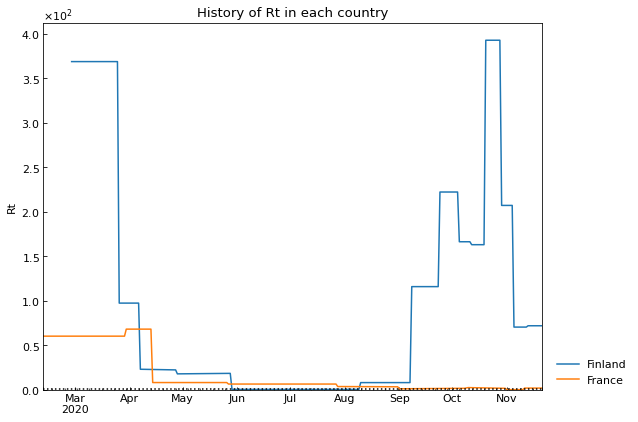

Country,Finland,France
Date,,
2020-11-17,71.86,1.81
2020-11-18,71.86,1.81
2020-11-19,71.86,1.81
2020-11-20,71.86,1.81
2020-11-21,71.86,1.81


In [14]:
analyser.history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

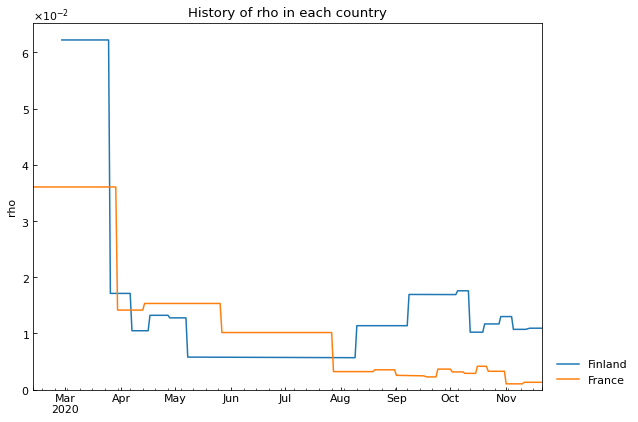

Country,Finland,France
Date,,
2020-11-17,0.010937,0.001318
2020-11-18,0.010937,0.001318
2020-11-19,0.010937,0.001318
2020-11-20,0.010937,0.001318
2020-11-21,0.010937,0.001318


In [15]:
analyser.history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

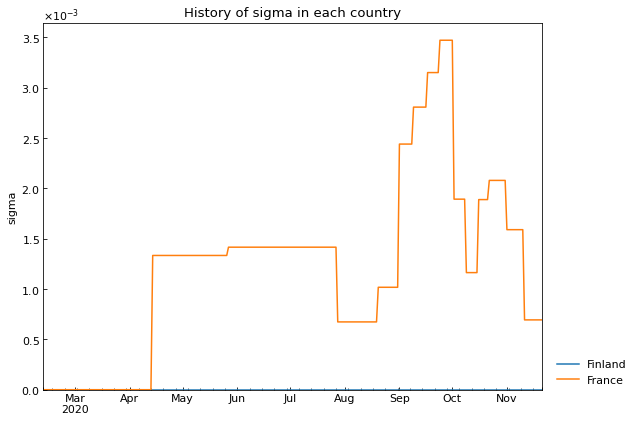

Country,Finland,France
Date,,
2020-11-17,0.0,0.000694
2020-11-18,0.0,0.000694
2020-11-19,0.0,0.000694
2020-11-20,0.0,0.000694
2020-11-21,0.0,0.000694


In [16]:
analyser.history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

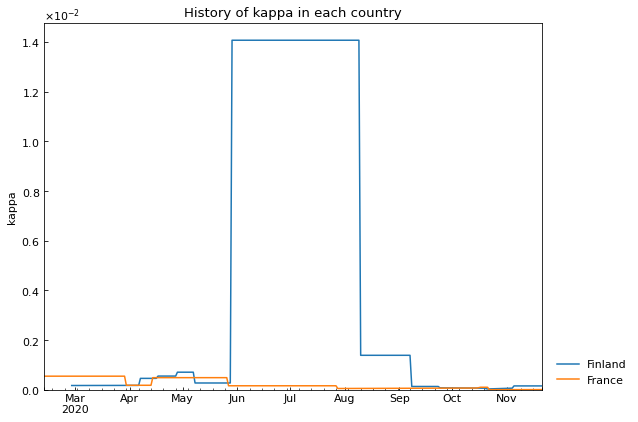

Country,Finland,France
Date,,
2020-11-17,0.000152,0.000005
2020-11-18,0.000152,0.000005
2020-11-19,0.000152,0.000005
2020-11-20,0.000152,0.000005
2020-11-21,0.000152,0.000005


In [17]:
analyser.history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

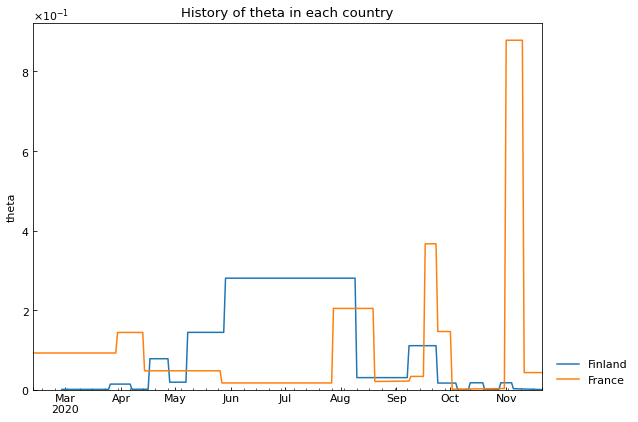

Country,Finland,France
Date,,
2020-11-17,0.000355,0.043019
2020-11-18,0.000355,0.043019
2020-11-19,0.000355,0.043019
2020-11-20,0.000355,0.043019
2020-11-21,0.000355,0.043019


In [18]:
analyser.history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7340 entries, 0 to 7353
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 7340 non-null   datetime64[ns]
 1   Country                              7340 non-null   object        
 2   Rt                                   7340 non-null   float64       
 3   theta                                7340 non-null   float64       
 4   kappa                                7340 non-null   float64       
 5   rho                                  7340 non-null   float64       
 6   sigma                                7340 non-null   float64       
 7   School_closing                       7340 non-null   int64         
 8   Workplace_closing                    7340 non-null   int64         
 9   Cancel_events                        7340 non-null   int64         
 10  Gatherings_r

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.053584,0.001083,0.672190,-0.593312,-0.164899,-0.208083,-0.223768,-0.560919,-0.514763,-0.293109,-0.561577,-0.440708,-0.354591,-0.402413,-0.512805,-0.279179
theta,-0.053584,1.000000,0.078460,-0.157125,0.034601,0.041169,0.144631,0.051876,0.005203,-0.001790,0.144147,0.012274,0.013394,0.011923,0.120815,0.028691,0.067461
kappa,0.001083,0.078460,1.000000,0.068363,-0.204874,-0.076629,-0.052934,-0.009233,-0.261821,-0.289961,-0.177686,-0.291779,-0.045756,-0.036803,-0.146839,-0.159492,-0.103533
rho,0.672190,-0.157125,0.068363,1.000000,-0.630867,-0.215086,-0.288733,-0.233947,-0.704902,-0.595572,-0.370998,-0.656793,-0.743549,-0.593485,-0.627097,-0.685608,-0.352812
sigma,-0.593312,0.034601,-0.204874,-0.630867,1.000000,0.097969,0.113878,0.096843,0.533385,0.492799,0.210539,0.513010,0.462642,0.378518,0.450934,0.524268,0.205459
School_closing,-0.164899,0.041169,-0.076629,-0.215086,0.097969,1.000000,0.954044,0.771702,0.596228,0.573985,0.891313,0.595205,0.571073,0.482782,-0.308399,-0.108588,0.938142
Workplace_closing,-0.208083,0.144631,-0.052934,-0.288733,0.113878,0.954044,1.000000,0.772688,0.601073,0.561204,0.923639,0.595784,0.598316,0.480189,-0.225091,-0.043231,0.937291
Cancel_events,-0.223768,0.051876,-0.009233,-0.233947,0.096843,0.771702,0.772688,1.000000,0.537041,0.495435,0.687999,0.554385,0.532253,0.682403,-0.042093,0.181227,0.894237
Gatherings_restrictions,-0.560919,0.005203,-0.261821,-0.704902,0.533385,0.596228,0.601073,0.537041,1.000000,0.883707,0.698163,0.939390,0.890962,0.733849,0.423533,0.640936,0.710633
Transport_closing,-0.514763,-0.001790,-0.289961,-0.595572,0.492799,0.573985,0.561204,0.495435,0.883707,1.000000,0.723387,0.951095,0.762688,0.637716,0.338169,0.548532,0.677586


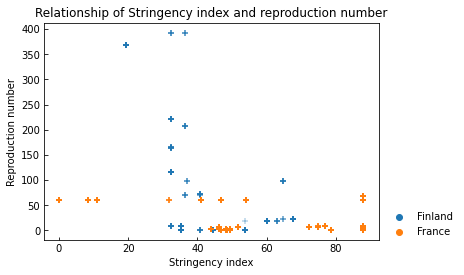

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()